<a href="https://colab.research.google.com/github/larigioad/projeto-pandas-mongo/blob/main/Projeto1_Larissa_Adami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




## 1.   Instalação das bibliotecas:






In [1]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.7 MB/s eta 0:00:00


In [2]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 KB 9.6 MB/s eta 0:00:00


## 2. Declaração das LIBS:

In [3]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa
from datetime import date

## 3. Conector para Google Storage - bucket: 

In [6]:
serviceAccount = '/content/bionic-region-377820-79a88015820f.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [7]:
client = storage.Client()
bucket = client.get_bucket('projeto-pandasmongo')
bucket.blob('marketing_campaign.csv')
path = 'gs://projeto-pandasmongo/brutos/marketing_campaign.csv'

## 4. Enviando para o MongoDB

Criei um Database no MongoDB chamado 'projeto_pandasmongo' e coloquei uma coleção para o df bruto chamada 'projeto_pandasmongo_bruto' e uma coleção para o arquivo tratado, chamado 'projeto_pandasmongo_tratado'.

In [ ]:
import pymongo
from pymongo import MongoClient

In [ ]:
uri = "mongodb+srv://larigioad.xj2ckxw.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-1801012685387590698.pem',
                     )


db = client['projeto_pandasmongo']
collection = db['projeto_pandasmongo_tratado']

In [ ]:
db = client['projeto_pandasmongo']
collectionpm = db['projeto_pandasmongo_tratado']
collectionpm.count_documents({})

0

In [ ]:
df_dict = df.to_dict("records")

collectionpm.insert_many(df_dict)

## 5. Extração dos dados: 

In [8]:
df = pd.read_csv(path,sep=',')

## 6. Pré análise:

In [9]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
# Tipo das colunas:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [11]:
# Tamanho do df:
df.shape

(2240, 29)

In [12]:
df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0


## 7. Transformação:

In [13]:
# Criando um back-up do df:
dfback = df.copy()

In [14]:
# Traduzindo o nome das colunas:
df.rename(columns={'Year_Birth':'Ano_de_Nascimento','Education':'Escolaridade','Marital_Status':'Estado_Civil','Income':'Renda', 'Kidhome': 'Crianças_na_Casa', 'Teenhome': 'Adolescentes_na_Casa', 'Dt_Customer': 'Cliente_desde', 'Recency': 'Última_compra_dias', 'MntWines': 'Qtd_de_Vinhos', 'MntFruits': 'Qtd_de_Frutas', 'MntMeatProducts': 'Qtd_Carnes', 'MntFishProducts': 'Qtd_Peixes', 'MntSweetProducts': 'Qtd_Doces', 'MntGoldProds': 'Qtd_Produtos_com_Ouro', 'NumDealsPurchases': 'Qtd_Compras_Promoção', 'NumWebPurchases': 'Qtd_Compras_Online', 'NumCatalogPurchases': 'Qtd_Compras_Catálogo', 'NumStorePurchases': 'Qtd_Compras_LojaFisica', 'NumWebVisitsMonth': 'Visitas_Site_Mês', 'Complain': 'Reclamações' },inplace=True)

In [15]:
# Excluindo colunas que não serão usadas:
df.drop(['AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response'],axis=1,inplace=True)

In [16]:
df.dtypes

ID                          int64
Ano_de_Nascimento           int64
Escolaridade               object
Estado_Civil               object
Renda                     float64
Crianças_na_Casa            int64
Adolescentes_na_Casa        int64
Cliente_desde              object
Última_compra_dias          int64
Qtd_de_Vinhos               int64
Qtd_de_Frutas               int64
Qtd_Carnes                  int64
Qtd_Peixes                  int64
Qtd_Doces                   int64
Qtd_Produtos_com_Ouro       int64
Qtd_Compras_Promoção        int64
Qtd_Compras_Online          int64
Qtd_Compras_Catálogo        int64
Qtd_Compras_LojaFisica      int64
Visitas_Site_Mês            int64
Reclamações                 int64
dtype: object

In [17]:
# Identificando valores únicos:
pd.unique(df['Ano_de_Nascimento'])

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [18]:
# Eliminando dados inconsistentes: anos 1900 e 1893.
df.replace([1900,1893],pd.NA,inplace=True)

In [19]:
# Transformando NA em NaN com Numpy:
df.replace(pd.NA,np.NaN,inplace=True)

In [20]:
pd.unique(df['Escolaridade'])

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [21]:
# Traduzindo a Escolaridade:
df.replace(['Graduation'], 'Graduação', inplace=True)
df.replace(['Master'], 'Mestrado', inplace=True)
df.replace(['Basic'], 'Ensino Fundamental', inplace=True)
df.replace(['2n Cycle'], 'Ensino Médio', inplace=True)

In [22]:
pd.unique(df['Estado_Civil'])

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [23]:
# Traduzindo o Estado Civil:
df.replace(['Single', 'Alone'], 'Solteiro(a)', inplace=True)
df.replace(['Together'], 'Em um relacionamento', inplace=True)
df.replace(['Married'], 'Casado(a)', inplace=True)
df.replace(['Divorced'], 'Divorciado(a)', inplace=True)
df.replace(['Widow'], 'Viúvo(a)', inplace=True)
df.replace(['Absurd'], 'Não informado', inplace=True)
df.replace(['YOLO'], 'Aproveitando a vida', inplace=True)

In [ ]:
pd.unique(df['Cliente_desde'])

In [ ]:

# Converter a coluna de datas para o formato de data/hora
df['Cliente_desde'] = pd.to_datetime(df['Cliente_desde'])

# Mudar a ordem da data para "DD-MM-YYYY"
df['Cliente_desde'] = df['Cliente_desde'].dt.strftime('%d-%m-%Y')


In [ ]:
pd.unique(df['Qtd_de_Vinhos'])

In [25]:
# Verificando dados nulos:
df.isna().sum()

ID                         0
Ano_de_Nascimento          2
Escolaridade               0
Estado_Civil               0
Renda                     24
Crianças_na_Casa           0
Adolescentes_na_Casa       0
Cliente_desde              0
Última_compra_dias         0
Qtd_de_Vinhos              0
Qtd_de_Frutas              0
Qtd_Carnes                 0
Qtd_Peixes                 0
Qtd_Doces                  0
Qtd_Produtos_com_Ouro      0
Qtd_Compras_Promoção       0
Qtd_Compras_Online         0
Qtd_Compras_Catálogo       0
Qtd_Compras_LojaFisica     0
Visitas_Site_Mês           0
Reclamações                0
dtype: int64

In [ ]:
filtronulo = df.Renda.isna()
df.loc[filtronulo]

In [27]:
df['Renda'].replace(0.0, np.nan, inplace=True)

Muitos clientes não informaram a renda, por isso consta como NaN.

## 8. Análise de dados (numérica)

In [29]:
#Checando a quantidade de clientes de cada estado civil:
estadocivil = df.groupby('Estado_Civil').size()
print(estadocivil)

Estado_Civil
Aproveitando a vida       2
Casado(a)               864
Divorciado(a)           232
Em um relacionamento    580
Não informado             2
Solteiro(a)             483
Viúvo(a)                 77
dtype: int64


A maioria dos clientes são casados ou estão em um relacionamento. 

In [30]:
#Criando uma coluna de idade dos clientes para facilitar análises:
df['Idade_Cliente'] = date.today().year - df['Ano_de_Nascimento']

In [31]:
# Listando as idades dos clientes:
idade = df.groupby('Idade_Cliente').size().sort_values(ascending=False)
print(idade)

Idade_Cliente
47.0     89
52.0     87
48.0     83
51.0     79
53.0     77
45.0     77
58.0     74
50.0     74
54.0     71
49.0     69
67.0     55
44.0     53
65.0     53
71.0     52
46.0     52
64.0     51
55.0     51
69.0     50
57.0     50
68.0     49
63.0     49
60.0     45
41.0     45
56.0     44
61.0     44
72.0     43
66.0     43
40.0     42
37.0     42
59.0     42
43.0     39
42.0     39
39.0     38
62.0     36
70.0     35
38.0     32
34.0     30
74.0     30
73.0     29
35.0     29
36.0     27
75.0     21
33.0     18
76.0     16
77.0     16
32.0     15
31.0     13
78.0      8
80.0      7
79.0      7
28.0      5
30.0      5
29.0      3
27.0      2
82.0      1
83.0      1
124.0     1
dtype: int64


## 9. Plotagens:

<AxesSubplot:xlabel='IDADE', ylabel='QUANTIDADE DE CLIENTES:'>

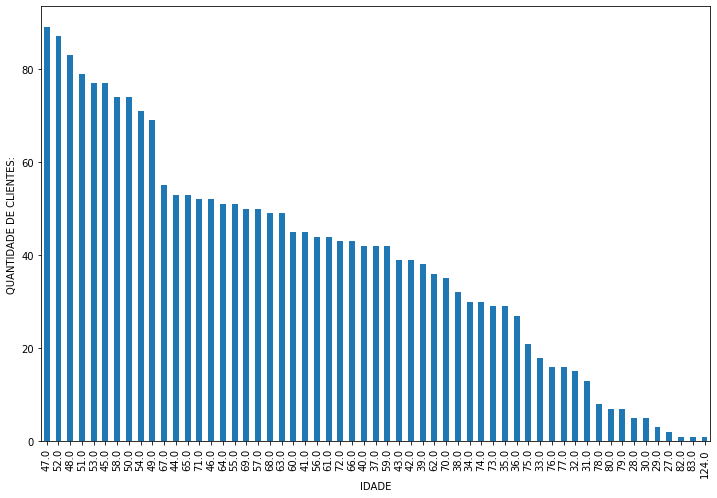

In [32]:
df.groupby('Idade_Cliente').size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='IDADE',ylabel='QUANTIDADE DE CLIENTES:')

Decidi deixar a idade de '124 anos' pois não tinha certeza se era um dado inconsistente ou real.

In [ ]:
# Checando a distribuição de renda dos clientes:

<AxesSubplot:ylabel='Declaração de Renda'>

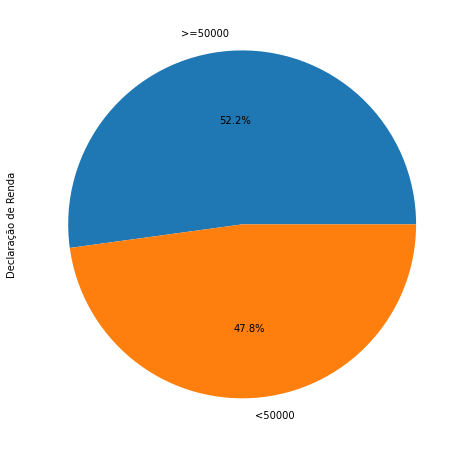

In [41]:
df['Faixa de Renda'] = pd.cut(df['Renda'], bins=[0, 50000, df['Renda'].max()], labels=['<50000', '>=50000'])
counts = df['Faixa de Renda'].value_counts()
counts.plot.pie(figsize=(12,8), ylabel='Declaração de Renda', autopct='%1.1f%%')

<AxesSubplot:xlabel='Itens', ylabel='Quantidade'>

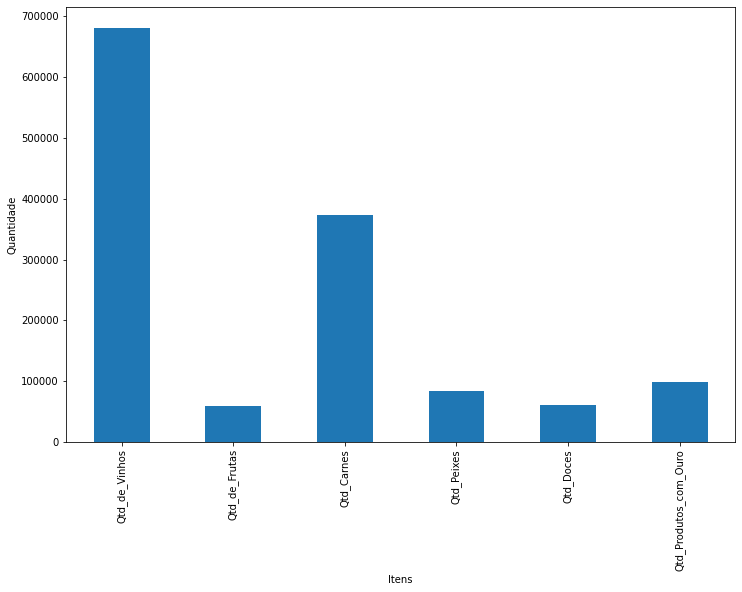

In [ ]:
# Checando a quantidade de produtos vendidos no período:
dfcolunas = df.loc[:, ['Qtd_de_Vinhos', 'Qtd_de_Frutas', 'Qtd_Carnes', 'Qtd_Peixes', 'Qtd_Doces', 'Qtd_Produtos_com_Ouro']]
somacolunas = dfcolunas.sum()
somacolunas.plot.bar(figsize=(12,8),xlabel='Itens',ylabel='Quantidade')

Algumas conclusōes: 

*   A renda total dos clientes é bem dividida, sendo 52,2% maior ou igual a 50.000 e 47,8% menor que 50.000.
*   Os itens mais comprados são vinhos, ficando entre 60 e 70 mil vinhos comprados. Seguido por carnes, entre 30 e 40 mil itens comprados.
*   A maioria dos clientes tem mais de 40 anos de idade.




In [42]:
# Salvando o arquivo tratado em csv:
df.to_csv('marketing_campaign_tratado.csv', index=False)